# Clase 3: Orquestación

<a id="section_toc"></a> 
## Tabla de Contenidos

[1. Introducción]()

$\hspace{.5cm}$[1). ¿Por qué vamos a ver una herramienta de Orquestación?]()

$\hspace{.5cm}$[2). ¿Por qué ver Mage si existe Airflow?]()

$\hspace{.5cm}$[3). ¿ Por qué ver Mage si existe Dagster?]()

[2. Como iniciar un servicio de Mage]()

$\hspace{.5cm}$[1). Creación de files]()

$\hspace{.5cm}$[2). Ejecutar Comandos]()

$\hspace{.5cm}$[3). Conexión al Servicio]()

$\hspace{.5cm}$[4). Configuración de las credenciales de Mage]()

$\hspace{.5cm}$[5). Testear la conexión a la base de datos]()

[3. Pipeline Estático]()

[4. Pipeline Realtime]()

# 1. Introducción

## 1). ¿Por qué vamos a ver una herramienta de Orquestación?

Las herramientas de orquestación de datos sirven para coordinar, automatizar y gestionar flujos de trabajo que involucran el movimiento y transformación de datos en un entorno de datos moderno. Son esenciales en un Modern Data Stack porque permiten garantizar que los procesos ocurran de manera eficiente y en el orden correcto. Algunos de los principales beneficios de estas herramientas incluyen:

* **Automatización de procesos**: Definen cuándo y cómo se deben ejecutar tareas o pipelines de datos sin intervención manual. Esto asegura que los datos estén siempre actualizados y listos para análisis.

* **Coordinación de tareas dependientes**: Las herramientas de orquestación permiten definir dependencias entre tareas, de modo que las tareas que dependen de otras no se ejecuten hasta que las previas hayan completado correctamente.

* **Monitoreo y gestión de errores**: Ofrecen visibilidad del estado de cada tarea dentro de un flujo, permitiendo identificar errores o retrasos en tiempo real y reaccionar ante fallos de manera eficiente.

* **Escalabilidad**: Estas herramientas pueden manejar pipelines de datos complejos que involucran múltiples fuentes y procesos de transformación, siendo capaces de escalar según el volumen de datos.

* **Reproducibilidad**: Facilitan la creación de pipelines reproducibles que permiten ejecutar los mismos procesos de forma consistente a lo largo del tiempo o en diferentes entornos.

* **Programación y ejecución**: Permiten programar flujos de trabajo en intervalos regulares (por ejemplo, diaria o semanalmente) o desencadenarlos en respuesta a eventos específicos.

## 2). ¿Por qué ver Mage si existe Airflow?

* **Simplicidad**: Mage está diseñado específicamente para pipelines de datos, lo que lo hace más sencillo de usar en comparación con Airflow, que es una herramienta más general y compleja. Esto facilita el aprendizaje y permite a los estudiantes enfocarse en los flujos de trabajo de datos sin enfrentar configuraciones complicadas.

* **Menos configuración**: Airflow requiere más configuración, mientras que Mage simplifica el proceso con una interfaz más amigable y menos necesidad de escribir código adicional.

* **Interfaz interactiva**: Mage ofrece una UI interactiva estilo notebook, permitiendo escribir código en Python, R o SQL sin preocuparse por el manejo de excepciones, ya que Mage se encarga de eso. Además, permite visualizar y analizar los resultados en tiempo real sin necesidad de desplegar todo el pipeline.

## 3). ¿ Por qué ver Mage si existe Dagster?

Mage AI  ofrece la posibilidad de trabajar tanto con una interfaz gráfica, lo que facilita la creación de pipelines de forma visual y rápida, como con código en Python, R o SQL para casos que requieren más personalización. Esto brinda flexibilidad para ajustarse a distintos niveles de experiencia y necesidades del proyecto, permitiendo un desarrollo más ágil o más detallado según sea necesario.

# 2. Como iniciar un servicio de Mage:

1). Creación de files: Para Crear Un servicio de Mage, primero hay que crear 4 files:

      a. Dockerfile

      b. requirements.txt

      c. .env

      d. docker-compose.yml

2). Ejecutar Comandos

3). Conexión al Servicio

4). Configuración de las credenciales de Mage

5). Testear la conexión a la base de datos


## 1). Creación de Files

### a). Dockerfile

```docker
FROM mageai/mageai:latest

ARG USER_CODE_PATH=/home/src/${PROJECT_NAME}

COPY requirements.txt ${USER_CODE_PATH}requirements.txt 

RUN pip3 install -r ${USER_CODE_PATH}requirements.txt
```

Explicación:

```docker
FROM mageai/mageai
```
Usa la última imagen oficial de Mage AI como base.

```docker
ARG USER_CODE_PATH
```
Define una variable para el directorio donde se guardará el código del proyecto.

```docker
COPY requirements.txt ${USER_CODE_PATH}requirements.txt 
```
Copia el archivo requirements.txt al contenedor en el directorio de código del usuario.

```docker
RUN pip3 install -r ${USER_CODE_PATH}requirements.txt
```

Instala las dependencias especificadas en el archivo requirements.txt dentro del contenedor usando pip. Esto asegura que el entorno del contenedor tenga las dependencias necesarias para ejecutar el proyecto.

### b). requirements.txt:

gtfs-realtime-bindings

**Explicación**:

Este archivo lista las dependencias de Python necesarias para el proyecto. En este caso, solo hay una dependencia: gtfs-realtime-bindings, que es una librería usada para manejar datos en tiempo real del sistema de transporte público GTFS. 


### c). `.env`

```yaml
PROJECT_NAME=orquestacion
POSTGRES_DBNAME=gtfs
POSTGRES_SCHEMA=public
POSTGRES_USER=postgres
POSTGRES_PASSWORD=1234
POSTGRES_PORT=5432
POSTGRES_HOST=postgres
```

**Explicación**:

.env contiene variables de entorno que son utilizadas tanto por Mage AI como por el servicio de PostgreSQL. Estas variables permiten configurar el entorno de forma flexible sin tener que modificar los archivos de configuración del código:

`PROJECT_NAME`: Define el nombre del proyecto de Mage AI.
`POSTGRES_DBNAME`, `POSTGRES_SCHEMA`, `POSTGRES_USER`, `POSTGRES_PASSWORD`, `POSTGRES_PORT`, `POSTGRES_HOST`: Configuran las credenciales y la conexión a la base de datos PostgreSQL que se está levantando junto al servicio de Mage AI.

**Aclaración**

Nunca es bueno subir un .env en un repositorio, de hecho, por default, git los agrega al file .gitignore:

```git
# Environments
.env
.venv
env/
venv/
ENV/
env.bak/
venv.bak/
```

Por lo general, cuando clonen un proyecto, no van a ver un archivo .env. A cambio, van a ver un archivo **.env.example** que tienen credenciales ficticias como:

```
PROJECT_NAME=example_project
POSTGRES_DBNAME=example_db
POSTGRES_USER=example_user
POSTGRES_PASSWORD=example_password
POSTGRES_HOST=localhost
POSTGRES_PORT=5432
```

En este caso, hay que copiar el archivo y cambiarle el nombre `.env`. En WSL se puede hacer con el comando:

```bash
cp .env.example .env
```

Luego hay que cambiar las credenciales ficticias por las reales.

### d. `docker-compose.yml`

```yaml
services:
  mage:
    image: mageai/mageai:latest
    # Utiliza la imagen oficial de Mage AI más reciente.
    
    command: mage start ${PROJECT_NAME}
    # Ejecuta el comando 'mage start' con el nombre del proyecto definido en la variable de entorno PROJECT_NAME.

    env_file:
      - .env
    # Carga las variables de entorno desde el archivo .env que contiene configuraciones necesarias.

    build:
      context: .
      # El contexto de la construcción es el directorio actual.
      
      dockerfile: Dockerfile
      # Define que el archivo Dockerfile del directorio actual se utilizará para construir la imagen personalizada.
      # Este archivo instala en el contenedor las dependencias que estén en el Requirements.txt
      
    environment:
      USER_CODE_PATH: /home/src/${PROJECT_NAME}
      # Establece la ruta donde se guardará el código del proyecto en el contenedor.

      POSTGRES_DBNAME: ${POSTGRES_DBNAME}
      POSTGRES_SCHEMA: ${POSTGRES_SCHEMA}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
      POSTGRES_HOST: ${POSTGRES_HOST}
      POSTGRES_PORT: ${POSTGRES_PORT}
      # Estas variables de entorno configuran los detalles de conexión a la base de datos PostgreSQL, utilizando los valores definidos en el archivo .env.

    ports:
      - 6789:6789
    # Mapea el puerto 6789 del contenedor al puerto 6789 del host para acceder al servicio de Mage AI desde el host.

    volumes:
      - .:/home/src/
    # Monta el directorio actual del host en el directorio /home/src/ dentro del contenedor, permitiendo que el código del proyecto esté accesible en el contenedor.

    restart: on-failure:5
    # Reinicia el contenedor hasta 5 veces en caso de fallo.

  postgres:
    image: postgres:14
    # Utiliza la imagen de PostgreSQL versión 14 para el servicio de base de datos.

    restart: on-failure
    # Reinicia el contenedor en caso de fallo.

    container_name: ${PROJECT_NAME}-postgres
    # Asigna un nombre al contenedor de PostgreSQL basado en el nombre del proyecto definido en PROJECT_NAME.

    env_file:
      - .env
    # Carga las variables de entorno desde el archivo .env, que incluye las credenciales de PostgreSQL.

    environment:
      POSTGRES_DB: ${POSTGRES_DBNAME}
      POSTGRES_USER: ${POSTGRES_USER}
      POSTGRES_PASSWORD: ${POSTGRES_PASSWORD}
      # Configura la base de datos de PostgreSQL con las credenciales definidas en el archivo .env.

    ports:
      - "${POSTGRES_PORT}:5432"
    # Mapea el puerto de PostgreSQL (5432) en el contenedor al puerto definido en POSTGRES_PORT en el host, permitiendo el acceso desde fuera del contenedor.

```

## 2). Ejecutar comandos

Si es la primera vez que ejecutas este docker-compose, o has modificado el Dockerfile, tenes que correr el siguiente comando para construir las imágenes y levantar los contenedores:

```bash
docker-compose up --build
```

Esto realizará la construcción y luego iniciará los servicios definidos en el archivo docker-compose.yml. El parámetro --build asegura que Docker compile las imágenes basadas en el Dockerfile, por si hay algún cambio o no se han generado antes.





Si ya construiste las imágenes anteriormente y solo necesitas levantar los servicios (sin cambios en el Dockerfile):

```bash
docker-compose up -d
```

## 3). Conexión al Servicio

Una vez que los contenedores están levantados:

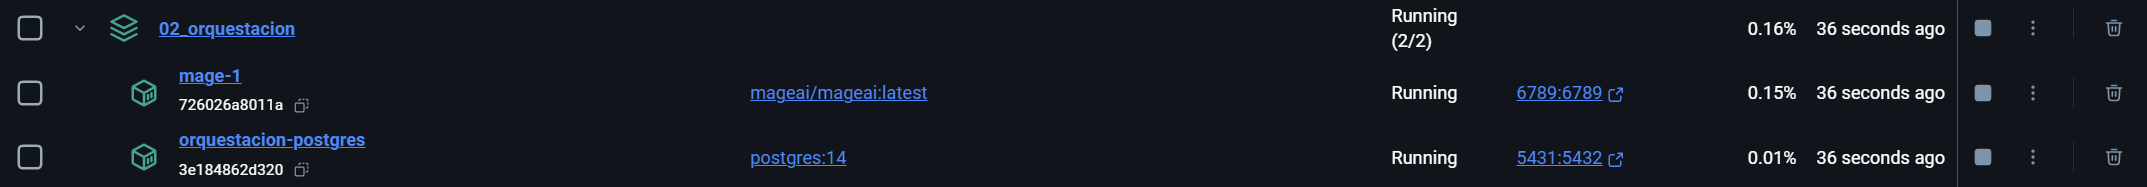

se puede acceder al servicio de mage con la URL: localhost:port

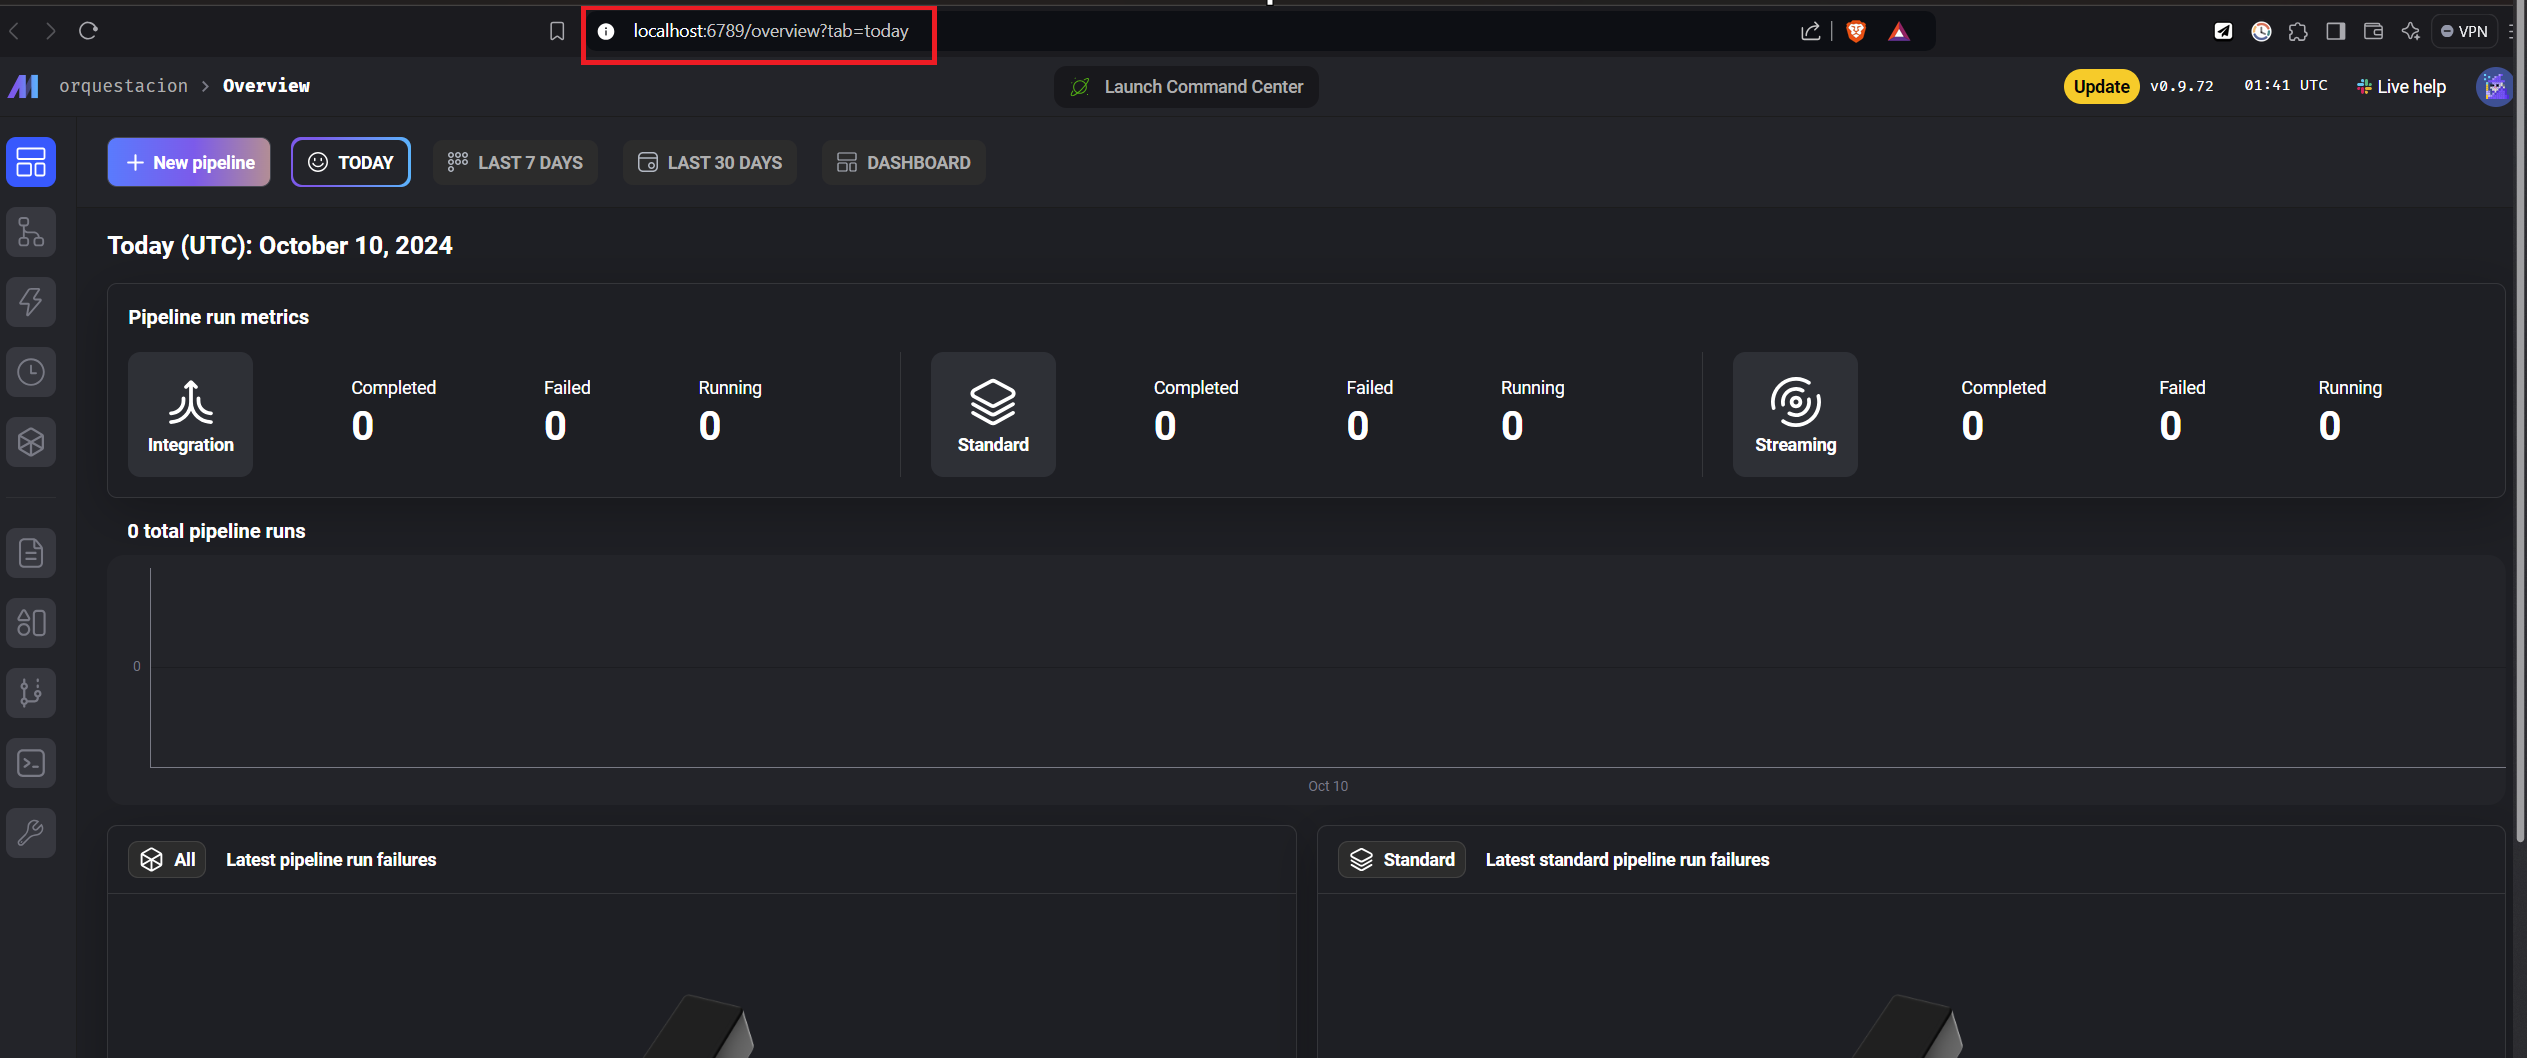

## 4). Configuración de las credenciales de Mage:

Dentro de la carpeta "orquestacion" (en realidad de cualquier nombre que hayamos elegido como nombre de proyecto), hay un archvivo de environment llamado `io_config.yaml`

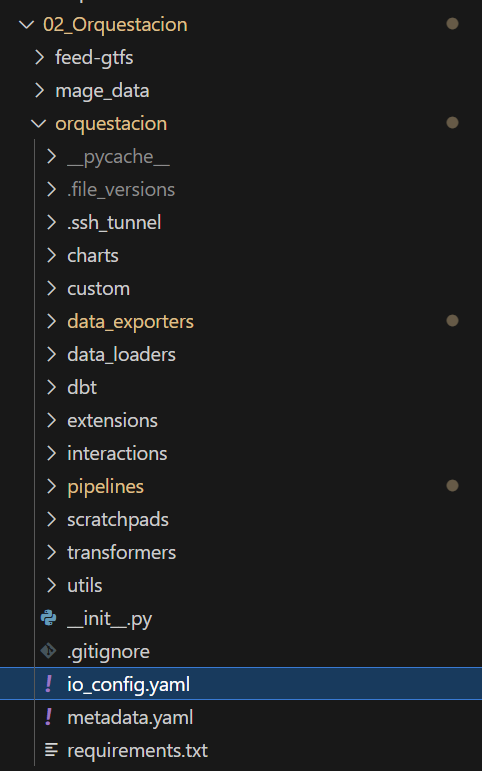

En ese archivo, MAGE busca las credenciales para conectarse a nuestra base de datos.

Por lo tanto, le tenemos que agregar al final:

```yaml
dev:
  POSTGRES_CONNECT_TIMEOUT: 10
  POSTGRES_DBNAME: "{{env_var('POSTGRES_DBNAME')}}"
  POSTGRES_SCHEMA: "{{env_var('POSTGRES_SCHEMA')}}"
  POSTGRES_USER: "{{env_var('POSTGRES_USER')}}"
  POSTGRES_PASSWORD: "{{env_var('POSTGRES_PASSWORD')}}"
  POSTGRES_HOST: "{{env_var('POSTGRES_HOST')}}"
  POSTGRES_PORT: "{{env_var('POSTGRES_PORT')}}"

```

La función `env_var` es del lenguaje Jinja, que se usa comúnmente en plantillas de configuración como las de DBT o YAML. En este caso, va a buscar las credenciales en las variables de entorno que están definidas en el archivo .env, cargado por Docker Compose a través de env_file. 


## 5). Testear la conexión a la base de datos.

Para ver si la conexión está funcionando, vamos a crear un pipeline sencillo:

a. Ir a Pipelines

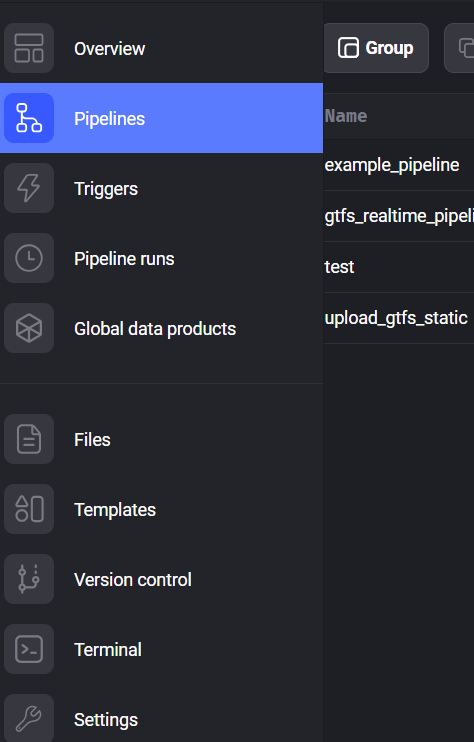

b. Poner +New y Standard(Batch)

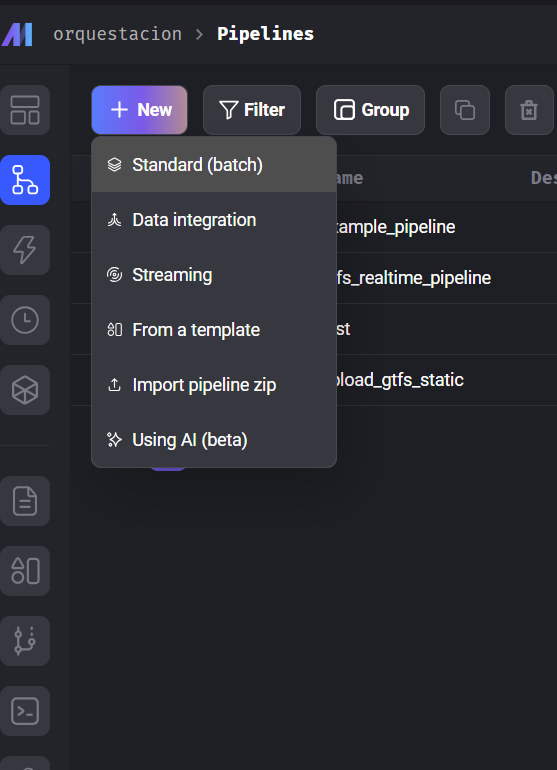

c. Elegir como nombre "test":

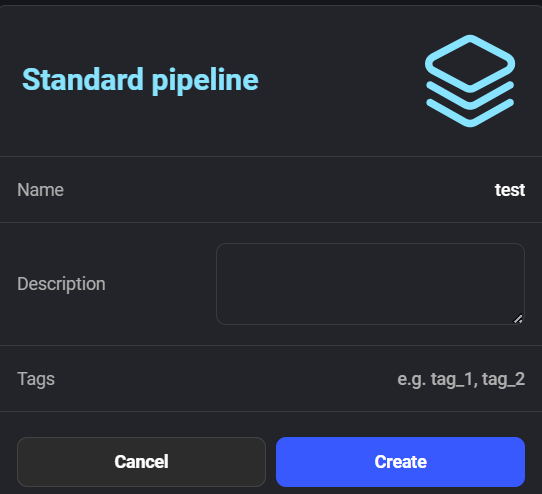

d. Crear un Data Loader con SQL

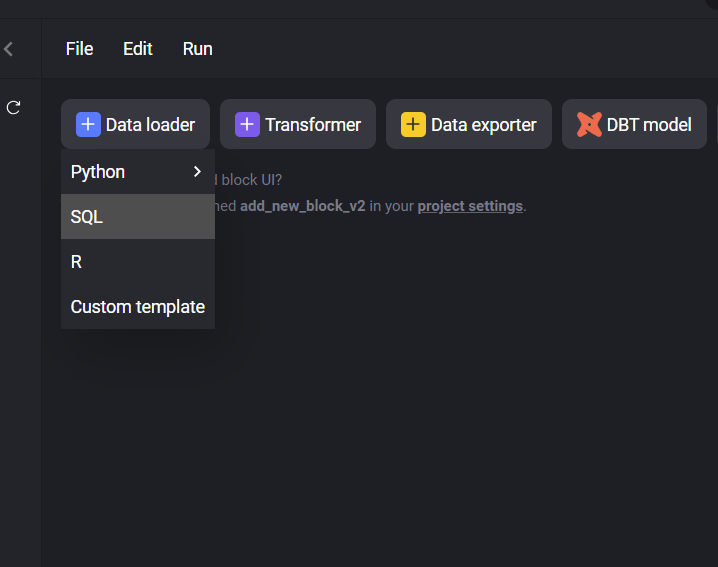

e. En Connection poner "PostgreSQL", en profile poner "dev" (Esto hace que Mage use las credenciales que definimos en el punto anterior para contectarse a Postgres), Clickear "Use Raw SQL" y escribir el comando `SELECT 1;`

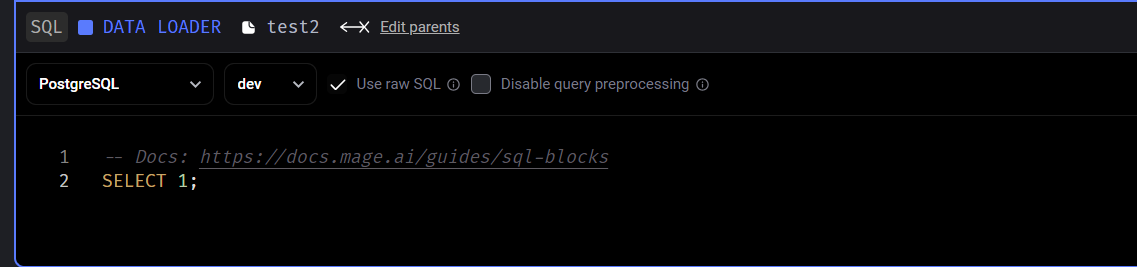

f. Ejecutar el bloque:

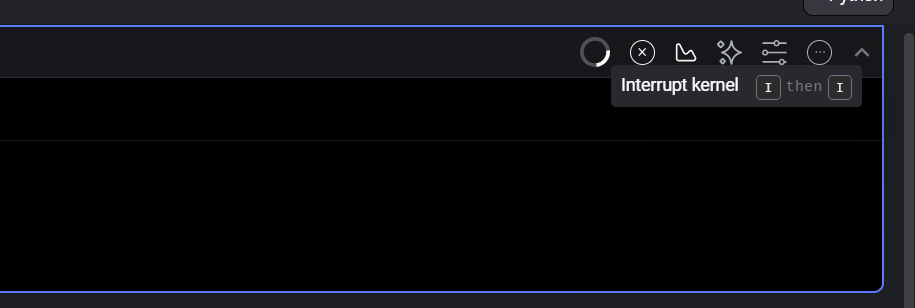

El comando `SELECT 1` se ejecuta en la base de datos Postgres, por lo tanto, para que pueda correr es necesario que Mage esté conectado a Postgres. Si ese comando nos tira error, tenemos que revisar si las credenciales en `io_config.yaml` están bien.

# 3. Pipeline Estático

En esta seccion, voy a crear un pipeline muy parecido al de la primer clase. Voy a utilizar Mage para leer un archivo GTFS y subirlo a la base de datos Postgres:
 

## 1). Crear un nuevo Pipeline Standard (Batch)

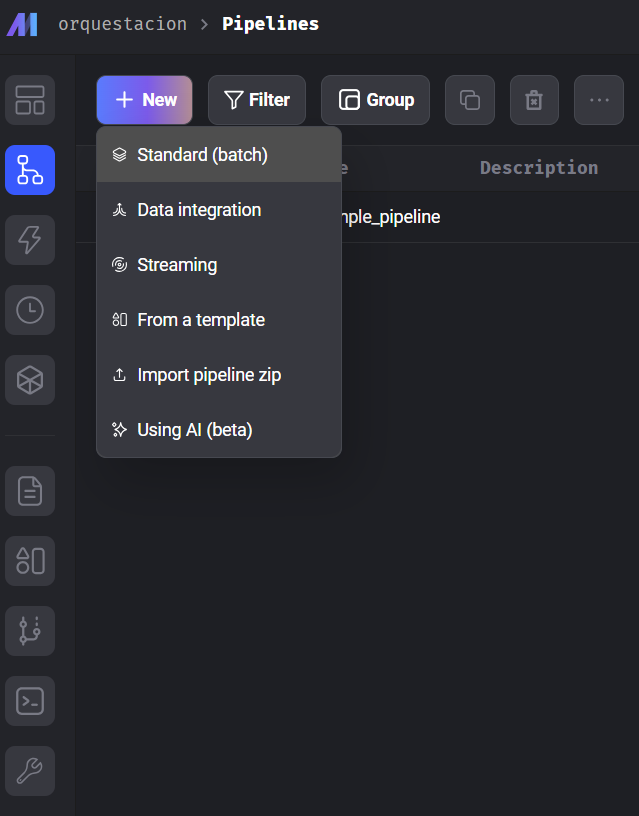

## 2). Nombrarlo

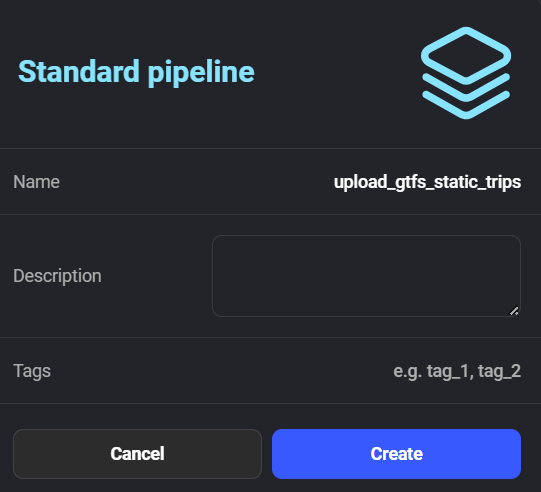

## 3). Crear un "Data Loader" con Python y "Local File"

```python
import pandas as pd

from mage_ai.io.file import FileIO
if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test


@data_loader
def load_data_from_file(*args, **kwargs):
    """
    Template for loading data from filesystem.
    Load data from 1 file or multiple file directories.

    For multiple directories, use the following:
        FileIO().load(file_directories=['dir_1', 'dir_2'])

    Docs: https://docs.mage.ai/design/data-loading#fileio
    """
    filepath = '/home/src/feed-gtfs/trips.txt'

    df = pd.read_csv(filepath)

    return df


@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'
```






**Nota**: 

Mage puede acceder y leer el archivo `filepath = '/home/src/feed-gtfs/trips.txt'` gracias  que se persistió un volumen en el docker compose:

```yaml
    volumes:
      - .:/home/src/
```


## 4). Crear un "Data Exporter"

```python
from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

if 'data_exporter' not in globals():
    from mage_ai.data_preparation.decorators import data_exporter


@data_exporter
def export_data_to_postgres(df: DataFrame, **kwargs) -> None:
    """
    Template for exporting data to a PostgreSQL database.
    Specify your configuration settings in 'io_config.yaml'.

    Docs: https://docs.mage.ai/design/data-loading#postgresql
    """
    schema_name = 'public'  # Specify the name of the schema to export data to
    table_name = 'agency'  # Specify the name of the table to export data to
    config_path = path.join(get_repo_path(), 'io_config.yaml')
    config_profile = 'dev'

    with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
        loader.export(
            df,
            schema_name,
            table_name,
            index=False,  # Specifies whether to include index in exported table
            if_exists='replace',  # Specify resolution policy if table name already exists
        )
```

## 4). Ejecutar el pipeline

Ir a "Triggers" y poner Run@once

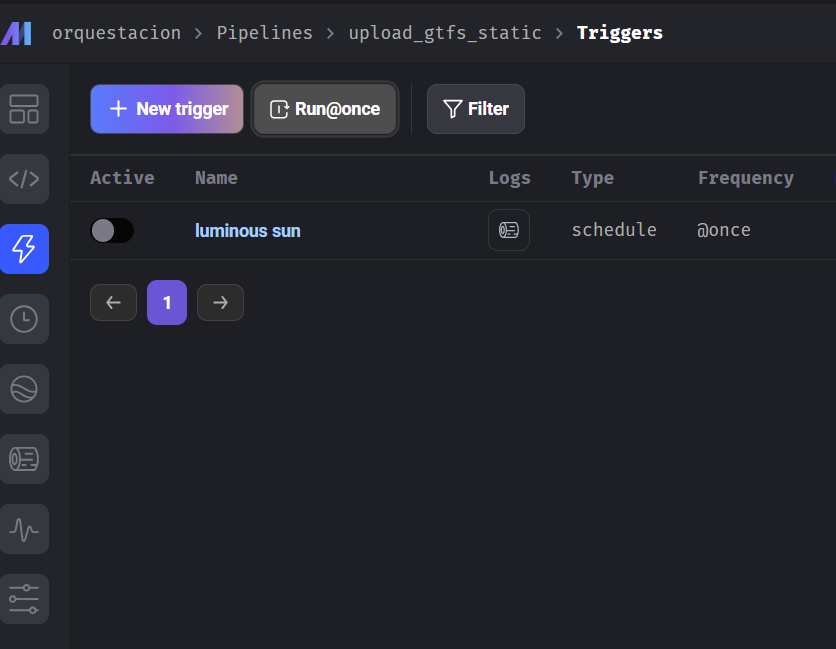

Una vez que el pipeline termine, vamos a ver "complete"

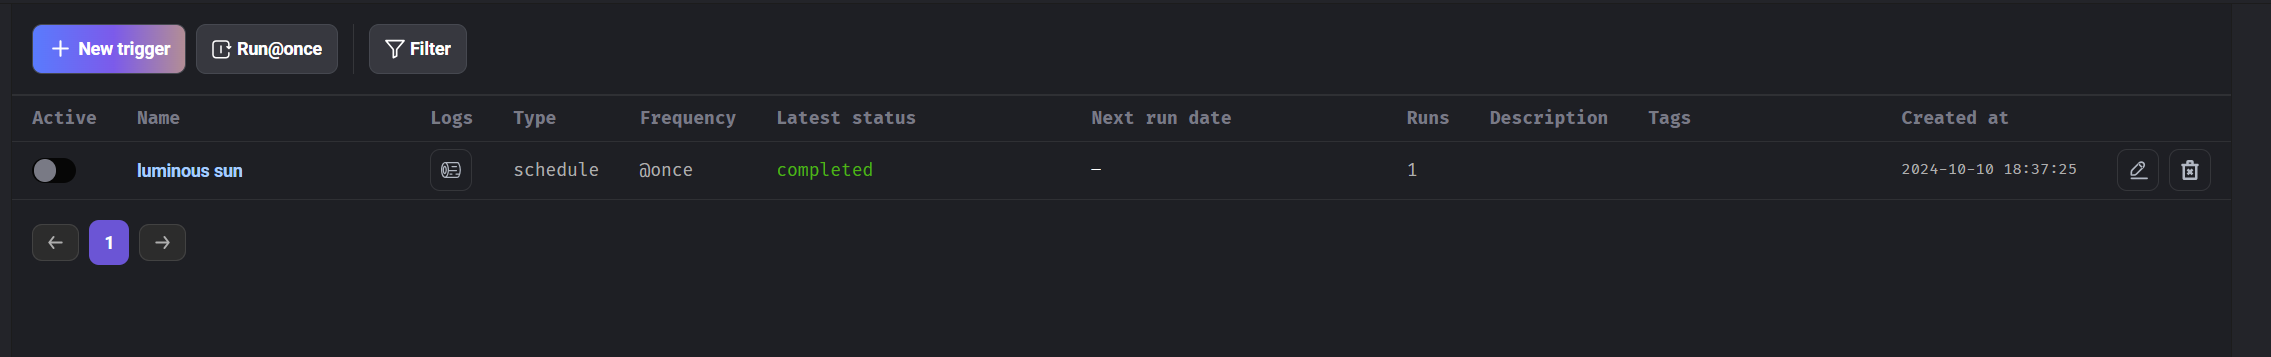

## 4. Pipeline Realtime

**¿Por qué levantar un servicio de Mage si acabamos de hacer lo mismo que la primera clase?**

Porque Mage nos va a permitir "Triggerear" un pipeline cada cierta cantidad de tiempo


## 1). Creación del Data Loader

Se crea un pipeline al igual que la sección anterior, nada más que esta vez se extraen los datos directamente desde una API:

```python
import io
import pandas as pd
import requests
import aiohttp
import asyncio
import nest_asyncio

from google.transit import gtfs_realtime_pb2

nest_asyncio.apply()  # Aplica parche para permitir bucles anidados

import logging

# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    
async def fetch_feed(session, url, params):
    try:
        async with session.get(url, params=params) as response:
            response.raise_for_status()  # Levantará una excepción para respuestas de error HTTP
            content = await response.read()
            feed = gtfs_realtime_pb2.FeedMessage()
            feed.ParseFromString(content)
            return feed
    except aiohttp.ClientError as e:
        logging.error(f"Error de cliente HTTP: {e}")
        print(e)
    except Exception as e:
        print(e)
        logging.error(f"Error inesperado: {e}")
    return None

async def main(client_id, client_secret):
    params = {
        'client_id': client_id,
        'client_secret': client_secret
    }
    url_positions = "https://apitransporte.buenosaires.gob.ar/colectivos/vehiclePositions"
    url_trip_updates = "https://apitransporte.buenosaires.gob.ar/colectivos/tripUpdates"

    async with aiohttp.ClientSession() as session:
        tasks = [
            fetch_feed(session, url_positions, params),
            fetch_feed(session, url_trip_updates, params)
        ]
        feed_vehpo, feed_tripup = await asyncio.gather(*tasks)

        if feed_vehpo and feed_tripup:
            # Procesamiento de datos aquí
            pass
    return feed_vehpo, feed_tripup


if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader
if 'test' not in globals():
    from mage_ai.data_preparation.decorators import test

def extract_trip_updates(feed):
    """
    Extrae los datos de trip updates de un objeto FeedMessage GTFS Realtime
    y los convierte en un DataFrame de pandas.
    
    Parámetros:
    - feed: Una instancia de gtfs_realtime_pb2.FeedMessage que contiene los trip updates.
    
    Retorna:
    - Un DataFrame de pandas con los datos de trip updates.
    """
    data = []
    for entity in feed.entity:
        if entity.HasField('trip_update'):
            trip_update = entity.trip_update
            trip = trip_update.trip
            vehicle = trip_update.vehicle

            for stop_time_update in trip_update.stop_time_update:
                arrival = stop_time_update.arrival
                data.append({
                    "header_timestamp" : feed.header.timestamp,
                    "entity_id": entity.id,
                    "trip_id": trip.trip_id,
                    "route_id": trip.route_id,
                    "start_time": trip.start_time,
                    "start_date": trip.start_date,
                    "vehicle_id": vehicle.id,
                    "vehicle_label": vehicle.label,
                    "stop_sequence": stop_time_update.stop_sequence,
                    "stop_id": stop_time_update.stop_id,
                    "arrival_delay": arrival.delay if arrival.HasField('delay') else None,
                    "arrival_time": arrival.time if arrival.HasField('time') else None
                })

    # Convertir a DataFrame
    df = pd.DataFrame(data)
    return df

def extract_vehicle_positions(feed):
    """
    Extrae los datos de las posiciones de los vehículos de un objeto FeedMessage GTFS Realtime
    y los convierte en un DataFrame de pandas.
    
    Parámetros:
    - feed: Una instancia de gtfs_realtime_pb2.FeedMessage que contiene las posiciones de los vehículos.
    
    Retorna:
    - Un DataFrame de pandas con los datos de las posiciones de los vehículos.
    """
    data = []
    for entity in feed.entity:
        if entity.HasField('vehicle'):
            vehicle = entity.vehicle
            position = vehicle.position
            trip = vehicle.trip
            data.append({
                "header_timestamp" : feed.header.timestamp,
                "entity_id": entity.id,
                "vehicle_id": vehicle.vehicle.id,
                "vehicle_label": vehicle.vehicle.label,
                "current_stop_sequence": vehicle.current_stop_sequence,
                "stop_id": vehicle.stop_id,
                "latitude": position.latitude,
                "longitude": position.longitude,
                "odometer": position.odometer if position.HasField('odometer') else None,
                "speed": position.speed if position.HasField('speed') else None,
                "timestamp": vehicle.timestamp,
                "trip_id": trip.trip_id if trip.HasField('trip_id') else None,
                "route_id": trip.route_id if trip.HasField('route_id') else None,
                "start_time": trip.start_time if trip.HasField('start_time') else None,
                "start_date": trip.start_date if trip.HasField('start_date') else None
            })

    # Convertir a DataFrame
    df = pd.DataFrame(data)
    return df

@data_loader
def load_data_from_api(*args, **kwargs):
    """
    Template for loading data from API
    """
    client_id = '46ca3fbfd5984ba8aa6a39cc165e43d1'
    client_secret = '621C7e8e3bdf41bC99095408AD1878F4'
    vehpo, tripup = asyncio.run(main(client_id, client_secret))

    
    return extract_vehicle_positions(vehpo), extract_trip_updates(tripup)  #pd.read_csv(io.StringIO(response.text), sep=',')

@test
def test_output(output, *args) -> None:
    """
    Template code for testing the output of the block.
    """
    assert output is not None, 'The output is undefined'
```

## 2). Creación del Data Exporter:

```python

from mage_ai.settings.repo import get_repo_path
from mage_ai.io.config import ConfigFileLoader
from mage_ai.io.postgres import Postgres
from pandas import DataFrame
from os import path

if 'data_exporter' not in globals():
    from mage_ai.data_preparation.decorators import data_exporter


@data_exporter
def export_data_to_postgres(df: DataFrame, **kwargs) -> None:
    """
    Template for exporting data to a PostgreSQL database.
    Specify your configuration settings in 'io_config.yaml'.

    Docs: https://docs.mage.ai/design/data-loading#postgresql
    """
    schema_name = 'realtime'  # Specify the name of the schema to export data to
    table_name = 'trip_updates'  # Specify the name of the table to export data to
    config_path = path.join(get_repo_path(), 'io_config.yaml')
    config_profile = 'dev'

    with Postgres.with_config(ConfigFileLoader(config_path, config_profile)) as loader:
        loader.export(
            df[1],
            schema_name,
            table_name,
            index=False,  # Specifies whether to include index in exported table
            if_exists='append',  # Specify resolution policy if table name already exists
        )
```

## 3). Crear un Trigger:

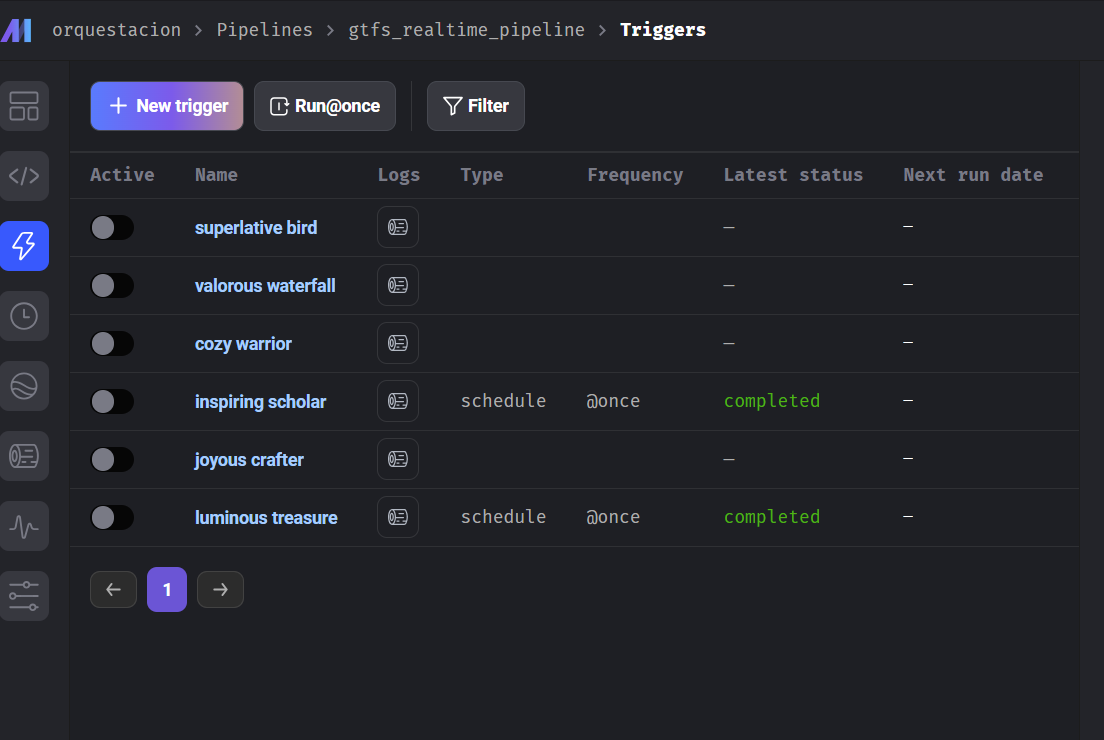

Configuración del Trigger:

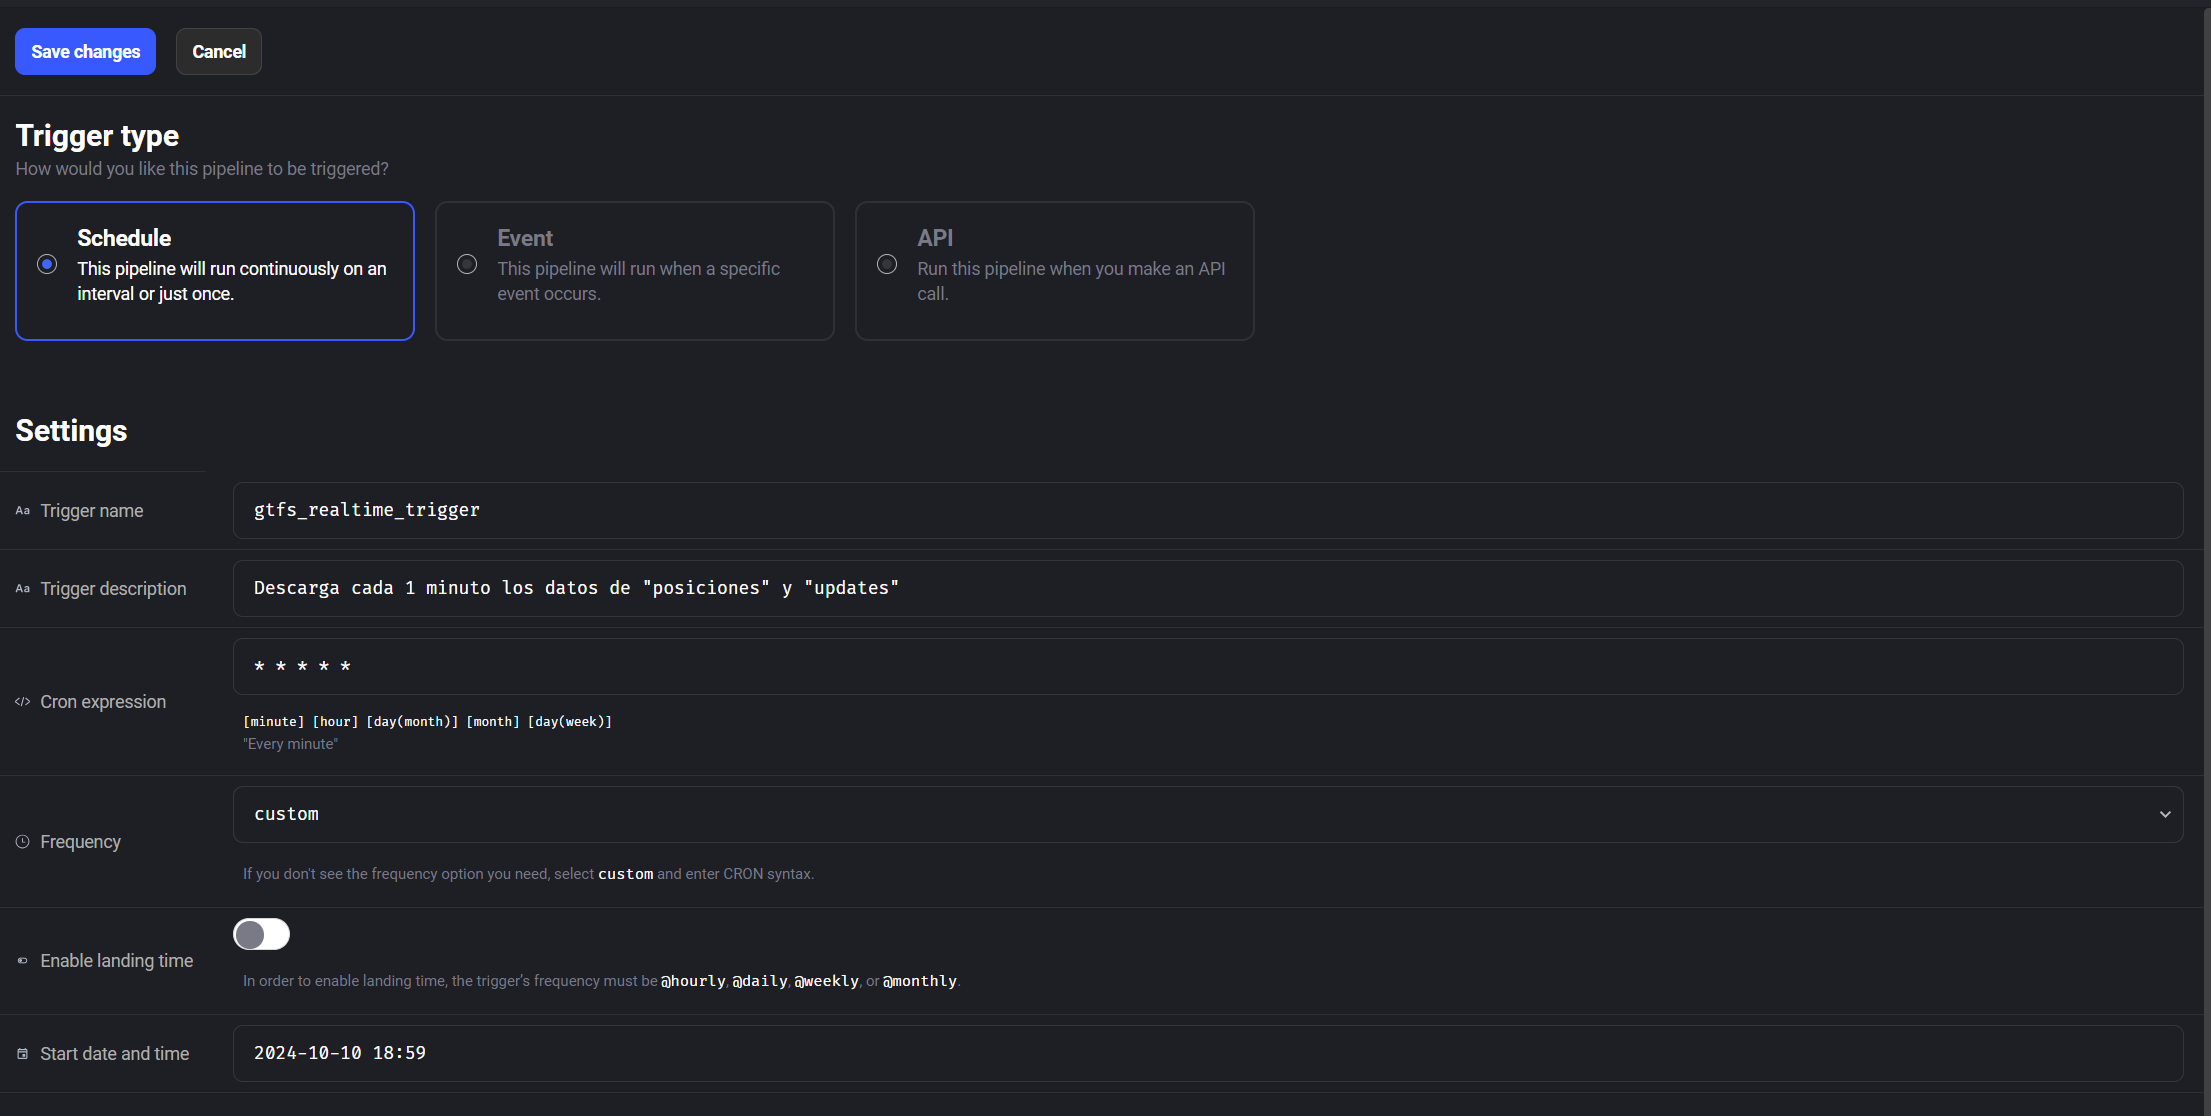

Revisar los "Runs":

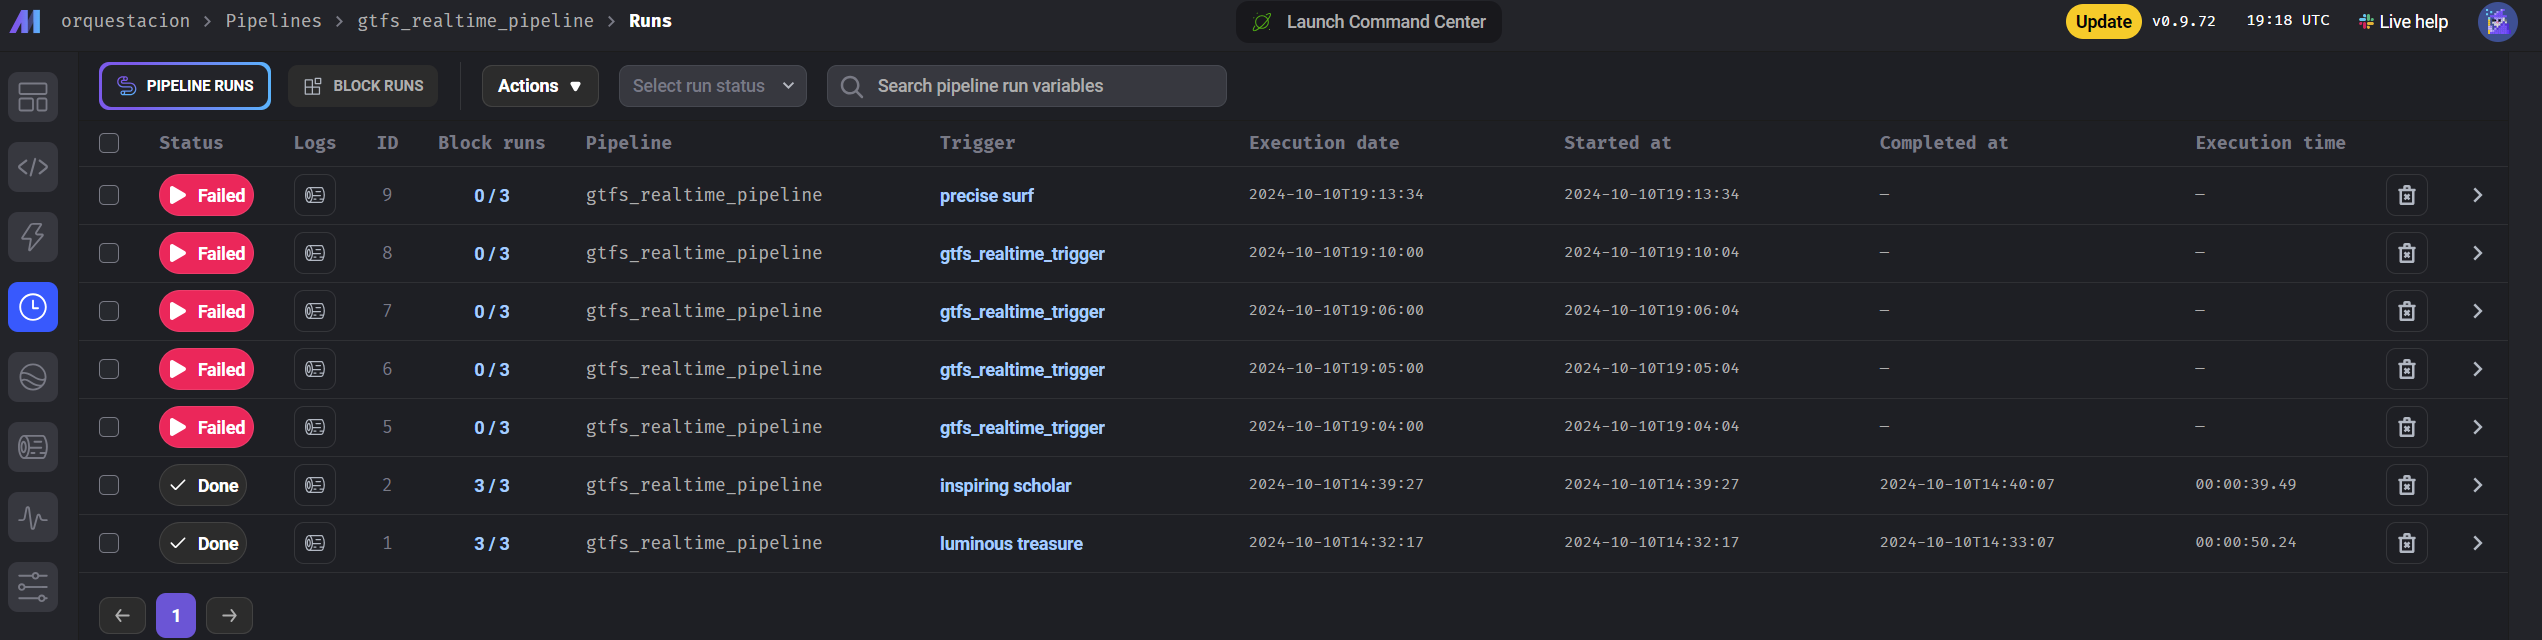

## 5. Ejercicio

Levantar un servicio de Mage e ingestar los datos de sus proyectos a la base Postgres